In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from nn import NeuralNetwork as NeuralNet
from matplotlib import pyplot as plt
from my_utils import get_crossValidation_datasets, transform_datasets

In [2]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
labels = digits.target
cols = digits.feature_names

data_df = pd.DataFrame(data, columns = cols)
labels_df = pd.DataFrame(labels, columns = ['target'])

dataset = pd.concat([data_df, labels_df], axis = 1)
dataset[cols] = (dataset[cols] - dataset[cols].min())/(dataset[cols].max() - dataset[cols].min())
dataset.fillna(0, inplace=True)

X_train, X_test = get_crossValidation_datasets(10, dataset)

In [3]:
def run_nn(setup, lamda, epochs, alpha, X_train, X_test):
    a = f = p = r = 0
    for k in range(10):
        train, test = transform_datasets(X_train[k], X_test[k])
        nn = NeuralNet(len(setup), setup)
        nn.reg_lambda = lamda
        nn.learning_rate = alpha
        nn.epochs = epochs
        nn.gradientDescent(train)
        accuracy, precision, recall, f1 = nn.evaluate(test)
        a += accuracy
        p += precision
        r += recall
        f += f1
    print("Average accuracy    = ", a/10)
    print("Average precision   = ", p/10)
    print("Average recall      = ", r/10)
    print("Average F1 score    = ", f/10)

In [12]:
run_nn([64,8,10], 0.25, 300, 1, X_train, X_test)

Average accuracy    =  0.967808407844027
Average precision   =  0.8593025097206386
Average recall      =  0.8390419676642586
Average F1 score    =  0.8279434777282166


In [13]:
run_nn([64,16,10], 0.25, 300, 1, X_train, X_test)

Average accuracy    =  0.9844104528511757
Average precision   =  0.9243937523175141
Average recall      =  0.9218249054007568
Average F1 score    =  0.9213159575444478


In [14]:
run_nn([64,8,8,10], 0.25, 300, 1, X_train, X_test)

Average accuracy    =  0.9682862454115531
Average precision   =  0.8387383627854923
Average recall      =  0.8403525971792225
Average F1 score    =  0.8317172151847124


In [15]:
run_nn([64,16,8,10], 0.25, 300, 1, X_train, X_test)

Average accuracy    =  0.9742938753434249
Average precision   =  0.8824074132314642
Average recall      =  0.8706381148950809
Average F1 score    =  0.8633197898366587


In [16]:
run_nn([64,16,16,10], 0.25, 400, 1, X_train, X_test)

Average accuracy    =  0.9872109633048881
Average precision   =  0.9383169057894291
Average recall      =  0.9358634330925353
Average F1 score    =  0.9357063911471807


In [17]:
run_nn([64,8,8,8,10], 0.25, 400, 1, X_train, X_test)

Average accuracy    =  0.9613186557342287
Average precision   =  0.8085573001024441
Average recall      =  0.80546783625731
Average F1 score    =  0.7890844809173757


In [18]:
run_nn([64,16,8,8,10], 0.25, 400, 1, X_train, X_test)

Average accuracy    =  0.9663995558290199
Average precision   =  0.8434996335826396
Average recall      =  0.83109391124871
Average F1 score    =  0.8234082998957041


In [4]:
run_nn([64,8,10], 0.1, 300, 1, X_train, X_test)

Average accuracy    =  0.9712952344248797
Average precision   =  0.8560801330371965
Average recall      =  0.8551702786377711
Average F1 score    =  0.8440080985862413


In [5]:
run_nn([64,16,10], 0.1, 300, 1, X_train, X_test)

Average accuracy    =  0.9871900932732818
Average precision   =  0.9378526312438851
Average recall      =  0.9356191950464396
Average F1 score    =  0.9352537418059865


In [6]:
run_nn([64,16,10], 0.1, 400, 1, X_train, X_test)

Average accuracy    =  0.989985003668755
Average precision   =  0.9523546700977041
Average recall      =  0.9496456828345374
Average F1 score    =  0.94950621133281


In [24]:
df = pd.read_csv('./data/parkinsons.csv')
df.rename(columns={"Diagnosis":"target"}, inplace=True)
df = (df-df.min())/(df.max()-df.min())
df.fillna(0, inplace=True)

X_train_p, X_test_p = get_crossValidation_datasets(10, df)

In [27]:
run_nn([22,8,2], 0.25, 360, 1, X_train_p, X_test_p)
print("-------------------------------------------------------")
run_nn([22,16,2], 0.25, 360, 1, X_train_p, X_test_p)
print("-------------------------------------------------------")
run_nn([22,8,8,2], 0.25, 360, 1, X_train_p, X_test_p)
print("-------------------------------------------------------")
run_nn([22,16,8,2], 0.25, 360, 1, X_train_p, X_test_p)
print("-------------------------------------------------------")
run_nn([22,16,8,4,2], 0.25, 360, 1, X_train_p, X_test_p)

Average accuracy    =  0.8616959064327483
Average precision   =  0.8463795518207282
Average recall      =  0.7686904761904761
Average F1 score    =  0.7923683451791071
-------------------------------------------------------
Average accuracy    =  0.8616959064327483
Average precision   =  0.8463795518207282
Average recall      =  0.7686904761904761
Average F1 score    =  0.7923683451791071
-------------------------------------------------------
Average accuracy    =  0.8616959064327483
Average precision   =  0.8549474789915965
Average recall      =  0.7686904761904761
Average F1 score    =  0.7928632583582529
-------------------------------------------------------
Average accuracy    =  0.8200292397660819
Average precision   =  0.7954718527086948
Average recall      =  0.734642857142857
Average F1 score    =  0.7440999228475509
-------------------------------------------------------
Average accuracy    =  0.8622514619883042
Average precision   =  0.8869580625772576
Average recall      =

In [28]:
run_nn([22,16,8,4,2], 0.25, 400, 1, X_train_p, X_test_p)

Average accuracy    =  0.8472514619883041
Average precision   =  0.8610388102609464
Average recall      =  0.7433333333333334
Average F1 score    =  0.7642135358289337


In [13]:
df = pd.read_csv('./data/parkinsons.csv')
df.rename(columns={"Diagnosis":"target"}, inplace=True)
df = (df-df.min())/(df.max()-df.min())
df.fillna(0, inplace=True)

x = []
y = []
train_df, test_df = get_crossValidation_datasets(10, df)
for k in range(10):
    train, test = transform_datasets(train_df[k], test_df[k])
    nn1 = NeuralNet(4, [22,8,8,2])
    nn1.reg_lambda = 0.25
    nn1.epochs = 360
    nn1.learning_rate = 1.0

    size = len(train)
    print("Epoch size : ", size)
    
    epochs = 1
    while epochs <= 360:
        nn1.update(train)
        x.append(epochs)
        y.append(nn1.compute_cost(test))
        epochs = epochs + 1
    break

Epoch size :  175


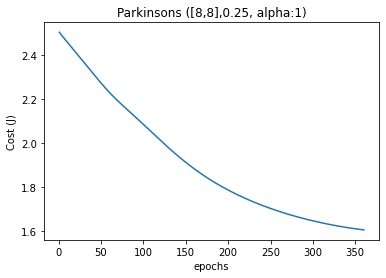

In [17]:
plt.plot(x,y)
plt.xlabel("epochs")
plt.ylabel("Cost (J)")
plt.title('Parkinsons ([8,8],0.25, alpha:1)')
plt.show()

Epoch size :  1612


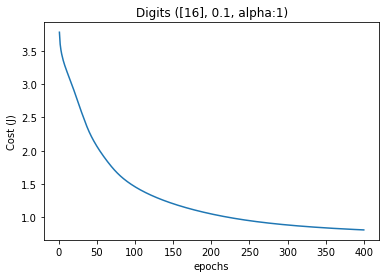

In [18]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
labels = digits.target
cols = digits.feature_names

data_df = pd.DataFrame(data, columns = cols)
labels_df = pd.DataFrame(labels, columns = ['target'])

dataset = pd.concat([data_df, labels_df], axis = 1)
dataset[cols] = (dataset[cols] - dataset[cols].min())/(dataset[cols].max() - dataset[cols].min())
dataset.fillna(0, inplace=True)

x = []
y = []
train_df, test_df = get_crossValidation_datasets(10, dataset)
for k in range(10):
    train, test = transform_datasets(train_df[k], test_df[k])
    nn1 = NeuralNet(3, [64,16,10])
    nn1.reg_lambda = 0.1
    nn1.epochs = 400
    nn1.learning_rate = 1.0

    size = len(train)
    print("Epoch size : ", size)
    
    epochs = 1
    while epochs <= 400:
        nn1.update(train)
        x.append(epochs)
        y.append(nn1.compute_cost(test))
        epochs = epochs + 1
    break

plt.plot(x,y)
plt.xlabel("epochs")
plt.ylabel("Cost (J)")
plt.title('Digits ([16], 0.1, alpha:1)')
plt.show()